In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv('dataset/Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
x = customer_data.iloc[:,[3,4]].values

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


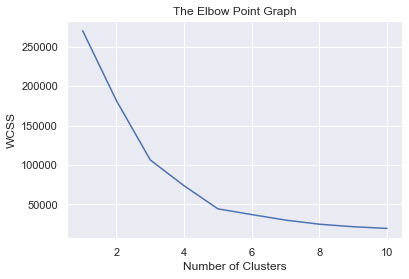

In [10]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

y = kmeans.fit_predict(x)

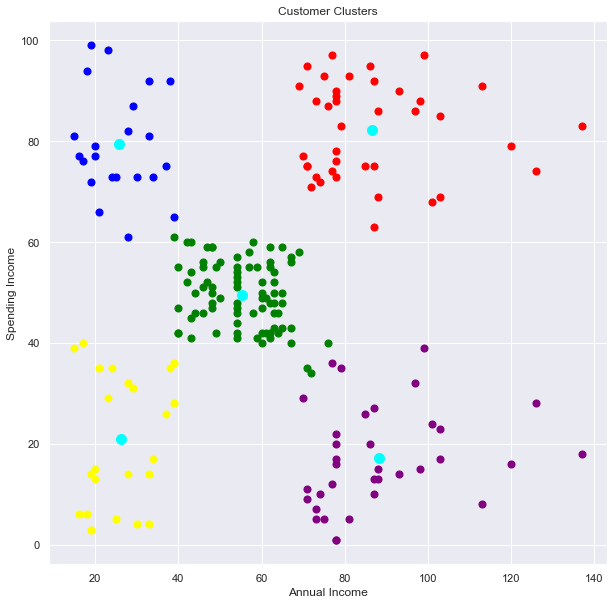

In [13]:
#PLotting the Scatter Plots Based On the Predicted CLusters

plt.figure(figsize=(10,10))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Clusters 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='blue', label='Clusters 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='red', label='Clusters 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='yellow', label='Clusters 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='purple', label='Clusters 5')

#plotting the centroids 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Income')
plt.show()